In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
# add root pth
import os 
import sys
import torchvision.transforms as transforms
repo_nm = 'pytorch_templates'
base_pth = os.getcwd().split(repo_nm)[0]
root_pth = f'{base_pth}/{repo_nm}'
sys.path.insert(0,root_pth)
%matplotlib inline
# from root folder
from data_templates.nbr_img_dataset import NumberImageDataset


In [17]:
# INSTANTIATE DATA SET
pth_annot = '../tests/number_sequences/annotations.csv'
pth_img ='../tests/number_sequences/'
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((64,64)),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
nid = NumberImageDataset(pth_annot, pth_img, transform=transform)

In [18]:
nid.__getitem__(1)

(tensor([[[-0.4482, -0.4048, -0.4048,  ..., -0.2000, -0.2000, -0.1925],
          [-0.4491, -0.4222, -0.4222,  ..., -0.2141, -0.2000, -0.1950],
          [-0.4510, -0.4346, -0.4363,  ..., -0.2077, -0.2000, -0.1934],
          ...,
          [-0.3992, -0.2728, -0.1743,  ..., -0.4303, -0.4169, -0.3584],
          [-0.3667, -0.2740, -0.2101,  ..., -0.4275, -0.3969, -0.3563],
          [-0.3814, -0.3074, -0.2923,  ..., -0.4275, -0.3967, -0.3541]],
 
         [[-0.3355, -0.2950, -0.2950,  ..., -0.0425, -0.0504, -0.0588],
          [-0.3367, -0.3118, -0.3045,  ..., -0.0510, -0.0431, -0.0588],
          [-0.3333, -0.3248, -0.3237,  ..., -0.0474, -0.0504, -0.0588],
          ...,
          [-0.2636, -0.1320, -0.0104,  ..., -0.3176, -0.3104, -0.2656],
          [-0.2333, -0.1303, -0.0543,  ..., -0.3176, -0.3022, -0.2656],
          [-0.2333, -0.1671, -0.1433,  ..., -0.3176, -0.3020, -0.2645]],
 
         [[-0.2913, -0.2552, -0.2488,  ...,  0.0725,  0.1103,  0.2201],
          [-0.2941, -0.2730,

In [24]:

train_dataloader = DataLoader(nid, batch_size=4, shuffle=True)


In [25]:
train_features, train_length, train_seq = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_seq.size()}")

tensor2pil = transforms.ToPILImage()
img = train_features[0]
img2 = tensor2pil(img)
label = train_seq[0]

print(f"Label: {label}")

Feature batch shape: torch.Size([4, 3, 64, 64])
Labels batch shape: torch.Size([4])
Label: 17


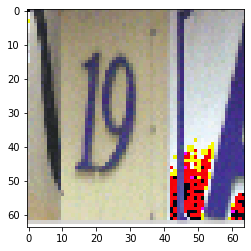

In [23]:
plt.imshow(img2)
plt.show()